In [90]:
# Importing the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style("whitegrid", {"xtick.major.size":8, "ytick.major.size":8})
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Importing the dataset
df = pd.read_csv('datawithdanny_marketing_datascience.csv')
df.head()

,age,job,marital,education,default,housing,loan,campaign,contact,month,day_of_week,duration,previous,outcome,btc.spotprice,btc.futures.index,target_variable
0,56,housemaid,married,basic.4y,no,no,no,1,telephone,may,mon,261,0,nonexistent,93.994,-36.4,no
1,57,services,married,high.school,unknown,no,no,1,telephone,may,mon,149,0,nonexistent,93.994,-36.4,no
2,37,services,married,high.school,no,yes,no,1,telephone,may,mon,226,0,nonexistent,93.994,-36.4,no
3,40,admin.,married,basic.6y,no,no,no,1,telephone,may,mon,151,0,nonexistent,93.994,-36.4,no
4,56,services,married,high.school,no,no,yes,1,telephone,may,mon,307,0,nonexistent,93.994,-36.4,no


In [3]:
# getting the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                41188 non-null  int64  
 1   job                41188 non-null  object 
 2   marital            41188 non-null  object 
 3   education          41188 non-null  object 
 4   default            41188 non-null  object 
 5   housing            41188 non-null  object 
 6   loan               41188 non-null  object 
 7   campaign           41188 non-null  int64  
 8   contact            17642 non-null  object 
 9   month              17642 non-null  object 
 10  day_of_week        17642 non-null  object 
 11  duration           41188 non-null  int64  
 12  previous           41188 non-null  int64  
 13  outcome            41188 non-null  object 
 14  btc.spotprice      41188 non-null  float64
 15  btc.futures.index  41188 non-null  float64
 16  target_variable    411

In [4]:
# Describing our dataset wrt continuous columns
df.describe()

,age,campaign,duration,previous,btc.spotprice,btc.futures.index
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,0.428329,109.962853,0.172963,93.575664,-40.502600
std,10.42125,0.494843,205.979003,0.494901,0.578840,4.628198
min,17.00000,0.000000,0.000000,0.000000,92.201000,-50.800000
25%,32.00000,0.000000,0.000000,0.000000,93.075000,-42.700000
50%,38.00000,0.000000,0.000000,0.000000,93.749000,-41.800000
75%,47.00000,1.000000,156.000000,0.000000,93.994000,-36.400000
max,98.00000,1.000000,4918.000000,7.000000,94.767000,-26.900000


In [5]:
# Getting all the column names of our dataset
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'campaign', 'contact', 'month', 'day_of_week', 'duration', 'previous',
       'outcome', 'btc.spotprice', 'btc.futures.index', 'target_variable'],
      dtype='object')

In [7]:
# Changing the categorical features columns datatype from object to category
df[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'outcome']] = \
df[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'outcome']].astype('category')

In [17]:
# Encoding our target variable to binary format
le = LabelEncoder()
df['target_variable'] = le.fit_transform(df.target_variable)

In [18]:
# Checking for missing values
df.isnull().sum()

age                      0
job                      0
marital                  0
education                0
default                  0
housing                  0
loan                     0
campaign                 0
contact              23546
month                23546
day_of_week          23546
duration                 0
previous                 0
outcome                  0
btc.spotprice            0
btc.futures.index        0
target_variable          0
dtype: int64

In [19]:
df.target_variable.value_counts()

0    36548
1     4640
Name: target_variable, dtype: int64

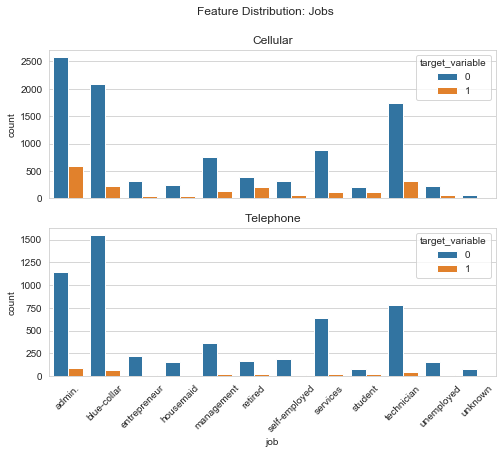

In [94]:
f, axes = plt.subplots(2, 1, figsize=(8,6), sharex=True)
plt.xticks(rotation=45)
plt.suptitle('Feature Distribution: Jobs')
sns.countplot(df.job[df.contact=='cellular'], hue=df.target_variable[df.contact=='cellular'], ax=axes[0])
sns.countplot(df.job[df.contact=='telephone'], hue=df.target_variable[df.contact=='telephone'], ax=axes[1])
axes[0].set_xlabel('')
axes[0].set_title('Cellular')
axes[1].set_title('Telephone')
plt.show()

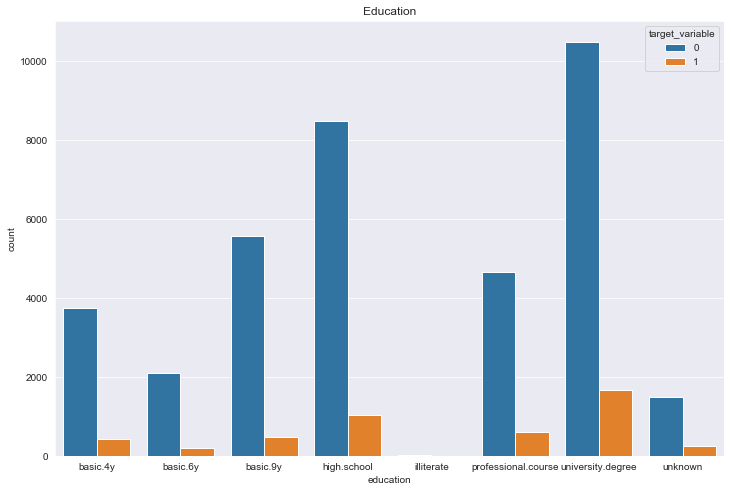

In [72]:
plt.figure(figsize=(12,8))
plt.title('Education')
sns.countplot(df.education, hue=df.target_variable)
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Education')
sns.countplot(df.education, hue=df.target_variable)
plt.show()

In [16]:
null_data = df[df.isnull().any(axis=1)]
null_data.head()

,age,job,marital,education,default,housing,loan,campaign,contact,month,day_of_week,duration,previous,outcome,btc.spotprice,btc.futures.index,target_variable
28,54,technician,single,university.degree,unknown,no,no,0,NaN,NaN,NaN,0,0,nonexistent,93.994,-36.4,no
49,45,blue-collar,married,basic.9y,no,yes,no,0,NaN,NaN,NaN,0,0,nonexistent,93.994,-36.4,no
54,55,blue-collar,married,basic.4y,unknown,no,no,0,NaN,NaN,NaN,0,0,nonexistent,93.994,-36.4,no
68,56,admin.,married,basic.9y,no,yes,no,0,NaN,NaN,NaN,0,0,nonexistent,93.994,-36.4,no
77,33,services,married,high.school,unknown,yes,no,0,NaN,NaN,NaN,0,0,nonexistent,93.994,-36.4,no


In [17]:
null_data.target_variable.value_counts()

no     21206
yes     2340
Name: target_variable, dtype: int64

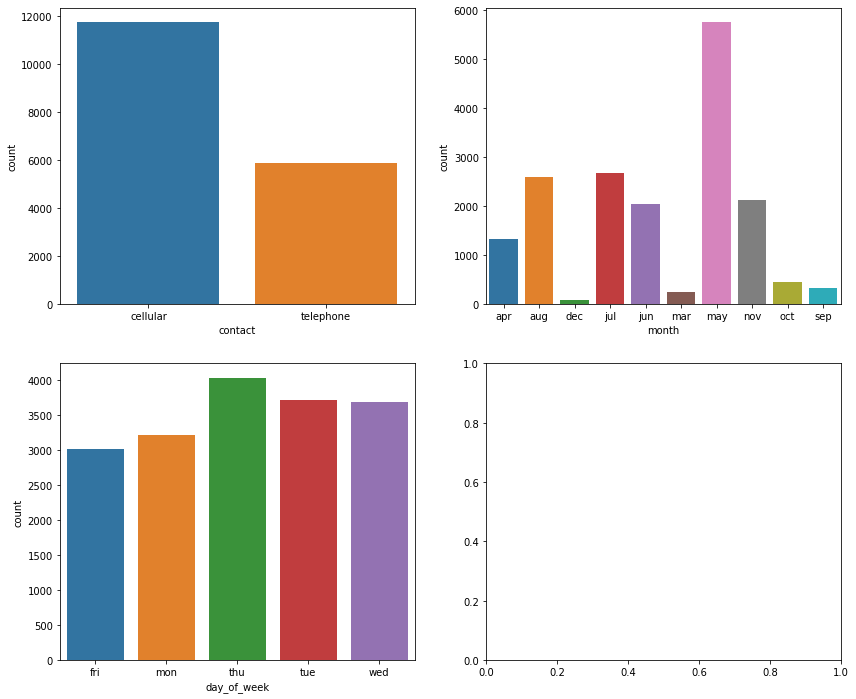

In [43]:
f, axes = plt.subplots(2,2, figsize=(14,12))
sns.countplot(df.contact, ax=axes[0,0])
sns.countplot(df.month, ax=axes[0,1])
sns.countplot(df.day_of_week, ax=axes[1,0])
plt.show()

In [26]:
# Filling the null values of categorical columns with their respective mode
df.contact.fillna(df.contact.mode()[0], inplace=True)
df.month.fillna(df.month.mode()[0], inplace=True)
df.day_of_week.fillna(df.day_of_week.mode()[0], inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   age                41188 non-null  int64   
 1   job                41188 non-null  category
 2   marital            41188 non-null  category
 3   education          41188 non-null  category
 4   default            41188 non-null  category
 5   housing            41188 non-null  category
 6   loan               41188 non-null  category
 7   campaign           41188 non-null  int64   
 8   contact            41188 non-null  category
 9   month              41188 non-null  category
 10  day_of_week        41188 non-null  category
 11  duration           41188 non-null  int64   
 12  previous           41188 non-null  int64   
 13  outcome            41188 non-null  category
 14  btc.spotprice      41188 non-null  float64 
 15  btc.futures.index  41188 non-null  float64 
 16  targ

In [153]:
df.head()

,age,job,marital,education,default,housing,loan,campaign,contact,month,day_of_week,duration,previous,outcome,btc.spotprice,btc.futures.index,target_variable
0,56,housemaid,married,basic.4y,no,no,no,1,telephone,may,mon,261,0,nonexistent,93.994,-36.4,no
1,57,services,married,high.school,unknown,no,no,1,telephone,may,mon,149,0,nonexistent,93.994,-36.4,no
2,37,services,married,high.school,no,yes,no,1,telephone,may,mon,226,0,nonexistent,93.994,-36.4,no
3,40,admin.,married,basic.6y,no,no,no,1,telephone,may,mon,151,0,nonexistent,93.994,-36.4,no
4,56,services,married,high.school,no,no,yes,1,telephone,may,mon,307,0,nonexistent,93.994,-36.4,no


In [40]:
df.job.cat.categories

Index(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'],
      dtype='object')

In [41]:
df.marital.cat.categories

Index(['divorced', 'married', 'single', 'unknown'], dtype='object')

In [42]:
df.education.cat.categories

Index(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
       'professional.course', 'university.degree', 'unknown'],
      dtype='object')

In [43]:
df.outcome.cat.categories

Index(['failure', 'nonexistent', 'success'], dtype='object')

In [44]:
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'outcome']

In [45]:
df_cat = df.loc[:,['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'outcome']]
df_cat.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,outcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [46]:
type(df_cat)

pandas.core.frame.DataFrame

In [47]:
dummy = pd.get_dummies(df.loc[:,['job','marital', 'education', 'education', 'default', 'housing', 
                                    'loan','contact', 'month', 'day_of_week', 'outcome']], drop_first=True)

In [48]:
dummy.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,outcome_nonexistent,outcome_success
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [54]:
df_new = pd.concat([df.drop(categorical, axis=1), dummy], axis=1)

In [55]:
df_new.head()

,age,campaign,duration,previous,btc.spotprice,btc.futures.index,target_variable,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,outcome_nonexistent,outcome_success
0,56,1,261,0,93.994,-36.4,no,0,0,1,...,1,0,0,0,1,0,0,0,1,0
1,57,1,149,0,93.994,-36.4,no,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,37,1,226,0,93.994,-36.4,no,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,40,1,151,0,93.994,-36.4,no,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,56,1,307,0,93.994,-36.4,no,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [59]:
df_new.shape

(41188, 57)

In [78]:
def generate_model_report(y_val, y_pred):
    print("Accuracy = " , accuracy_score(y_val, y_pred))
    print("Precision = " ,precision_score(y_val, y_pred))
    print("Recall = " ,recall_score(y_val, y_pred))
    print("F1 Score = " ,f1_score(y_val, y_pred))
    pass

In [96]:
def generate_auc_roc_curve(clf, X_val):
    y_pred_proba = clf.predict_proba(X_val)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_val,  y_pred_proba)
    auc = roc_auc_score(y_val, y_pred_proba)
    plt.figure(figsize=(8,4))
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

In [155]:
X = df_new.drop('target_variable', axis=1)
y = df_new.target_variable

In [157]:
print("X Shape : ", X.shape)
print("y Shape : ", y.shape)

X Shape :  (41188, 56)
y Shape :  (41188,)


In [158]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)

In [135]:
# Building the XGboost model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [136]:
# Predicting values of validation set
y_pred = xgb.predict(X_val)

In [137]:
# Plotting the confusion matrix
cm = confusion_matrix(y_val, y_pred)
cm 

array([[7116,  194],
       [ 566,  362]], dtype=int64)

In [138]:
# Validating our model performance
generate_model_report(y_val, y_pred)

Accuracy =  0.9077445982034474
Precision =  0.6510791366906474
Recall =  0.3900862068965517
F1 Score =  0.4878706199460917


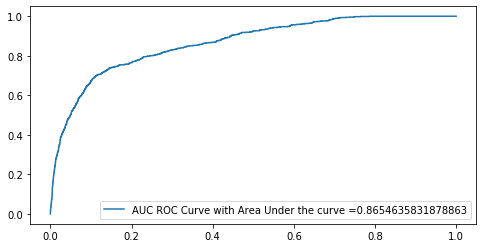

In [139]:
# Validating the AUC_ROC curve
generate_auc_roc_curve(xgb, X_val)

In [194]:
# Building the RandomForest Model
rf = RandomForestClassifier(n_estimators=300, class_weight='balanced')
rf.fit(X_val, y_val)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [195]:
# Predicting values of validation set
y_pred = rf.predict(X_val)

In [196]:
# Plotting the confusion matrix
cm = confusion_matrix(y_val, y_pred)
cm 

array([[7251,   59],
       [   4,  924]], dtype=int64)

In [197]:
# Validating our model performance
generate_model_report(y_val, y_pred)

Accuracy =  0.992352512745812
Precision =  0.9399796541200407
Recall =  0.9956896551724138
F1 Score =  0.9670329670329669


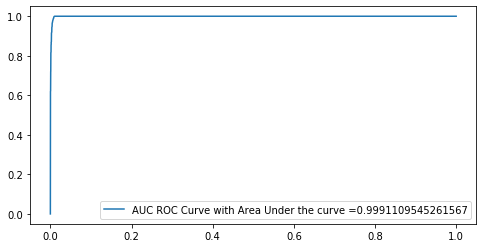

In [164]:
# Validating the AUC_ROC curve
generate_auc_roc_curve(rf, X_val)

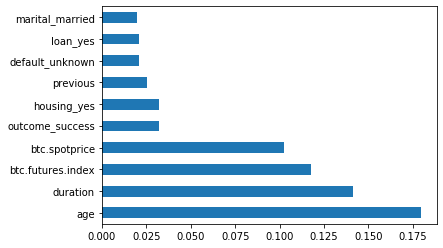

In [202]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()